In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore') 
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
bank = pd.read_csv('bank-additional-full.csv', delimiter=';')
bank.shape

(41188, 21)

In [5]:
bank

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

In [11]:
X = bank.copy()

y
no     36548
yes     4640
Name: y, dtype: int64


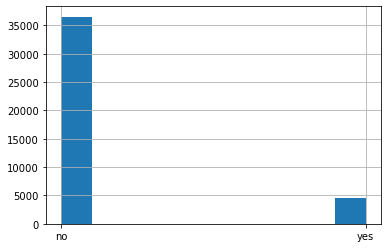

In [4]:
print(X.groupby('y')['y'].count())
X.y.hist()

In [12]:
X['y'][X['y']=='no'] = 0
X['y'][X['y']=='yes'] = 1
X

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed  y  
0           5191.0  0  
1           5191.0  0  
2           5191.0  0  
3           5191.0  0  
4           5191.0  0  
...            ... ..  
41183       4963.6  1  
41184       4963.6  0  
41185       4963.6  0  
41186       4963.6  1  
41187       4963.6  0  

[41188 rows x 21 columns]

# < Column + y 관계 확인 >

## Age
* y = 'yes' : 60대 이상 약 0.5

In [178]:
#age
X.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [229]:
plt.figure(figsize = (15,3))
plt.title('Age')
sns.distplot(X.age, kde=False, bins=100, color="black")
plt.show()

In [233]:
X["age_range"] = pd.cut(X["age"],
                  bins=[20,30,40,50,60,98],
                  labels=['20','30','40','50','60'])

ages=X.groupby(['age_range'])[['y']]
age=ages.sum()
age['count']=ages.count()
age['rate']=age['y']/age['count']
age['index']=age.index
age

y  count      rate index
age_range                             
20         1067   7243  0.147315    20
30         1597  16385  0.097467    30
40          837  10240  0.081738    40
50          668   6270  0.106539    50
60          414    910  0.454945    60

In [232]:
age.index

CategoricalIndex(['20', '30', '40', '50', '60'], categories=['20', '30', '40', '50', '60'], ordered=True, name='age_range', dtype='category')

In [270]:
# 비율

graph = sns.barplot(x='index', y='rate',color='pink', data=age)
sns.despine(left=True)
graph.set_xticklabels(['20s','30s','40s','50s','over 60s'])
plt.title(" 'Y' rate by Age range(%)")
plt.show()

In [284]:
# 카운트

graph = sns.barplot(x='index', y='y',color='hotpink', data=age)
sns.despine(left=True)
graph.set_xticklabels(['20s','30s','40s','50s','over 60s'])
plt.title(" 'Y' count by Age range")
plt.show()

## Job
* y = 'yes' 비율 높음 : student(0.3), retired(0.25) 

In [22]:
#job column 확인

bank.groupby('job')['y'].unique()
bank[bank['y']=='yes']['job'].unique()

array(['blue-collar', 'entrepreneur', 'technician', 'housemaid',
       'unknown', 'services', 'management', 'admin.', 'student',
       'unemployed', 'self-employed', 'retired'], dtype=object)

In [181]:
#job_df 만들어서 count확인

job_df = bank.groupby(['y','job'])[['job']].count()
job_df.rename(columns={'job':'count'}, inplace=True)
job_df

count
y   job                 
no  admin.          9070
    blue-collar     8616
    entrepreneur    1332
    housemaid        954
    management      2596
    retired         1286
    self-employed   1272
    services        3646
    student          600
    technician      6013
    unemployed       870
    unknown          293
yes admin.          1352
    blue-collar      638
    entrepreneur     124
    housemaid        106
    management       328
    retired          434
    self-employed    149
    services         323
    student          275
    technician       730
    unemployed       144
    unknown           37

In [182]:
# 비율도 함께 확인

jobs = X.groupby(['job'])[['y']]
job = jobs.sum()
#job1.rename(columns={'y':'count'}, inplace=True)
job

y
job                
admin.         1352
blue-collar     638
entrepreneur    124
housemaid       106
management      328
retired         434
self-employed   149
services        323
student         275
technician      730
unemployed      144
unknown          37

In [183]:
job['count'] = jobs.count()
job['rate'] = job['y']/job['count']
job['index'] = job.index
job

y  count      rate          index
job                                                
admin.         1352  10422  0.129726         admin.
blue-collar     638   9254  0.068943    blue-collar
entrepreneur    124   1456  0.085165   entrepreneur
housemaid       106   1060  0.100000      housemaid
management      328   2924  0.112175     management
retired         434   1720  0.252326        retired
self-employed   149   1421  0.104856  self-employed
services        323   3969  0.081381       services
student         275    875  0.314286        student
technician      730   6743  0.108260     technician
unemployed      144   1014  0.142012     unemployed
unknown          37    330  0.112121        unknown

In [184]:
job.index

Index(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'],
      dtype='object', name='job')

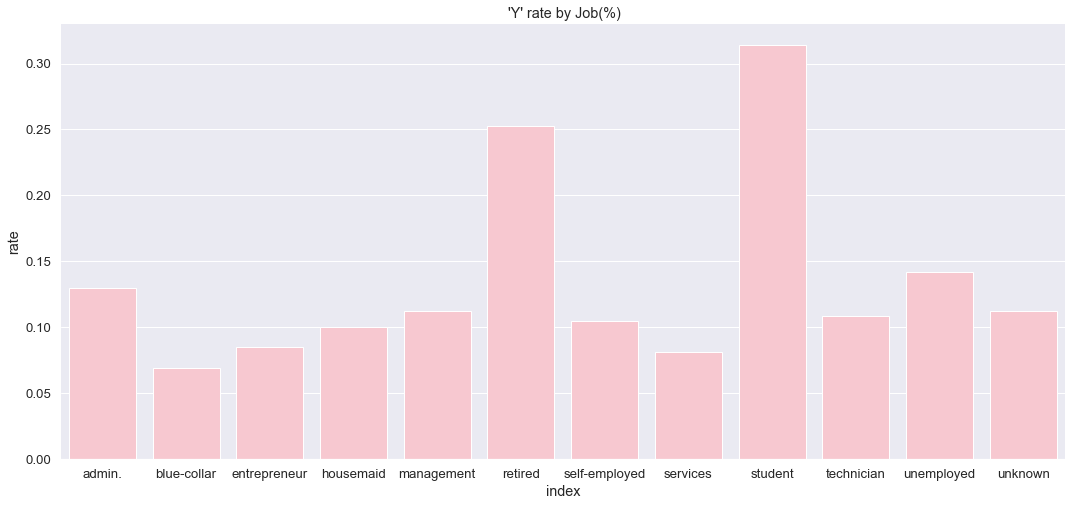

In [275]:
# 비율

plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='rate',color='pink', data=job)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'])

plt.title(" 'Y' rate by Job(%)")
plt.show()

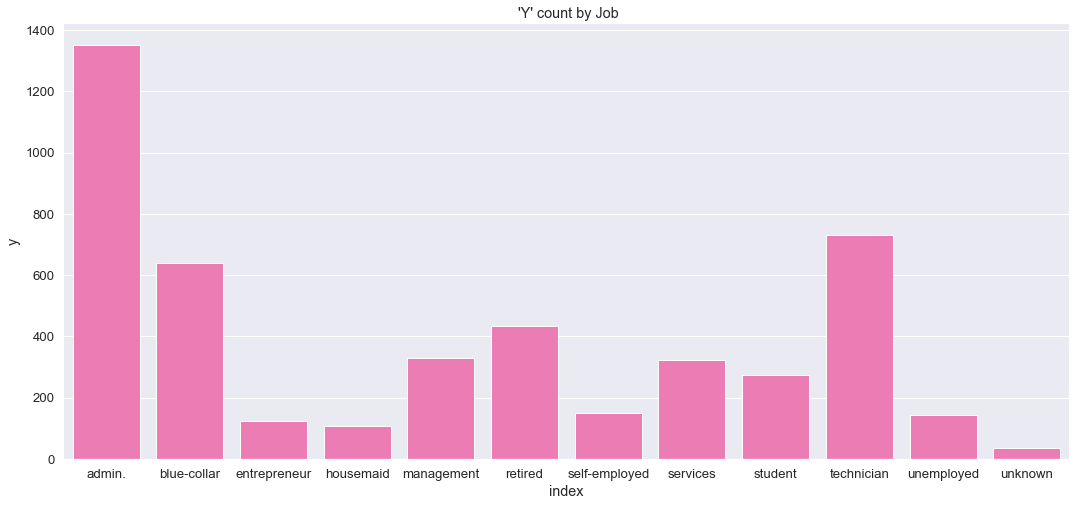

In [291]:
# 카운트

plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='y',color='hotpink', data=job)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'])

plt.title(" 'Y' count by Job")
plt.show()

## Marital Status
* 별로.

In [21]:
#marital
X[X['y']=='yes']['marital'].unique()

array(['divorced', 'married', 'single', 'unknown'], dtype=object)

In [3]:
X.groupby(['marital','y'])['marital'].count()

marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948
          yes     1620
unknown   no        68
          yes       12
Name: marital, dtype: int64

In [187]:
maritals = X.groupby(['marital'])[['y']]
marital = maritals.sum()
marital['count'] = maritals.count()
marital['rate'] = marital['y']/marital['count']
marital['index'] = marital.index
marital

y  count      rate     index
marital                                  
divorced   476   4612  0.103209  divorced
married   2532  24928  0.101573   married
single    1620  11568  0.140041    single
unknown     12     80  0.150000   unknown

In [189]:
marital.index

Index(['divorced', 'married', 'single', 'unknown'], dtype='object', name='marital')

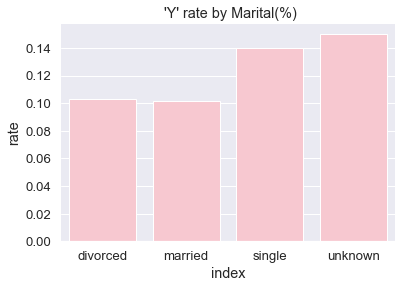

In [191]:
# 비율

#plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='rate',color='pink', data=marital)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['divorced', 'married', 'single', 'unknown'])

plt.title(" 'Y' rate by Marital(%)")
plt.show()

In [290]:
# 카운트

#plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='y',color='hotpink', data=marital)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['divorced', 'married', 'single', 'unknown'])

plt.title(" 'Y' count by Marital")
plt.show()

## Education
* 문맹.. 그래도 비슷.. 애초에 observation 너무 적음

In [199]:
#Education
X.groupby(['y','education'])[['education']].count()

education
y education                     
0 basic.4y                  3748
  basic.6y                  2104
  basic.9y                  5572
  high.school               8484
  illiterate                  14
  professional.course       4648
  university.degree        10498
  unknown                   1480
1 basic.4y                   428
  basic.6y                   188
  basic.9y                   473
  high.school               1031
  illiterate                   4
  professional.course        595
  university.degree         1670
  unknown                    251

In [215]:
educations = X.groupby(['education'])[['y']]
education = educations.sum()
education['count'] = educations.count()
education['rate'] = education['y']/education['count']
education['index'] = education.index
education

y  count      rate                index
education                                                      
basic.4y              428   4176  0.102490             basic.4y
basic.6y              188   2292  0.082024             basic.6y
basic.9y              473   6045  0.078246             basic.9y
high.school          1031   9515  0.108355          high.school
illiterate              4     18  0.222222           illiterate
professional.course   595   5243  0.113485  professional.course
university.degree    1670  12168  0.137245    university.degree
unknown               251   1731  0.145003              unknown

In [217]:
education.index

Index(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown'],
      dtype='object', name='education')

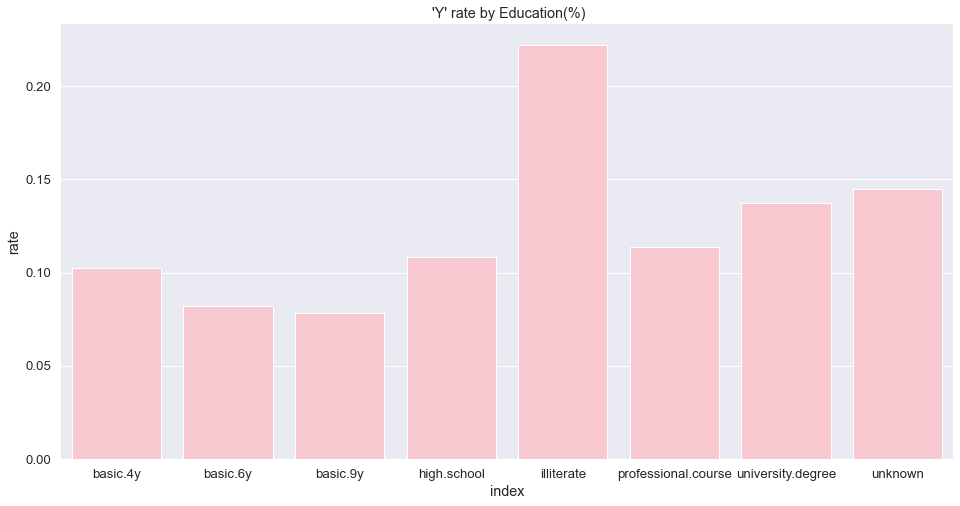

In [221]:
# 비율

plt.figure(figsize=(16,8))
graph = sns.barplot(x='index', y='rate',color='pink', data=education)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown'])

plt.title(" 'Y' rate by Education(%)")
plt.show()

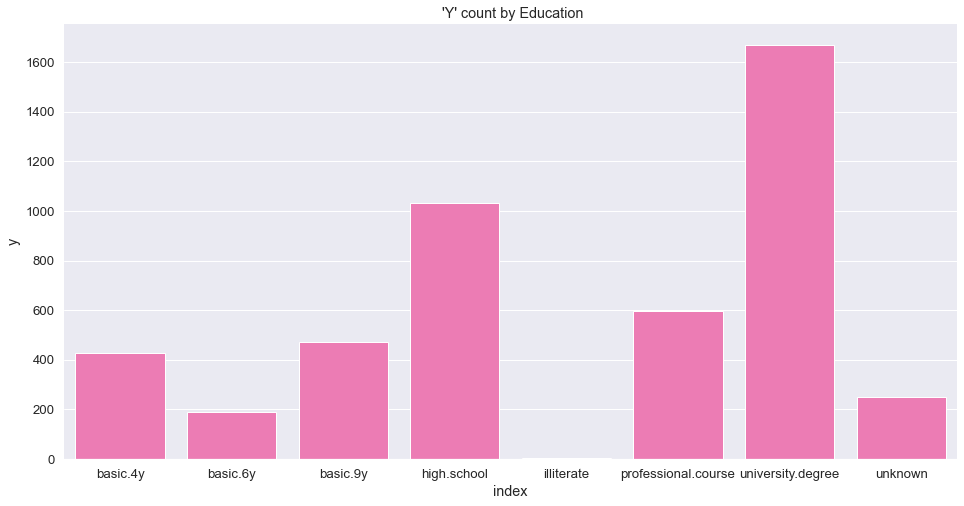

In [289]:
# 카운트

plt.figure(figsize=(16,8))
graph = sns.barplot(x='index', y='y',color='hotpink', data=education)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown'])

plt.title(" 'Y' count by Education")
plt.show()

## Default => 삭제

In [5]:
#default
bank.groupby('default')['default'].count()

default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [6]:
bank[bank['default']=='yes']['y']

21580    no
21581    no
24866    no
Name: y, dtype: object

In [238]:
X.drop('default', axis=1, inplace=True)

## Loan
* 의미 없음

In [197]:
#loan
X.groupby(['y','loan'])[['loan']].count()

loan
y loan          
0 no       30100
  unknown    883
  yes       5565
1 no        3850
  unknown    107
  yes        683

In [192]:
loans = X.groupby(['loan'])[['y']]
loan = loans.sum()
loan['count'] = loans.count()
loan['rate'] = loan['y']/loan['count']
loan['index'] = loan.index
loan

y  count      rate    index
loan                                   
no       3850  33950  0.113402       no
unknown   107    990  0.108081  unknown
yes       683   6248  0.109315      yes

In [193]:
loan.index

Index(['no', 'unknown', 'yes'], dtype='object', name='loan')

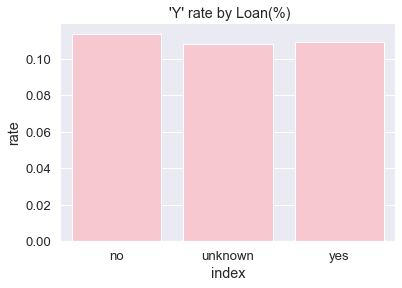

In [194]:
#plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='rate',color='pink', data=loan)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['no', 'unknown', 'yes'])

plt.title(" 'Y' rate by Loan(%)")
plt.show()

## Housing
* 관련 x

In [196]:
#housing 
X.groupby(['y','housing'])[['housing']].count()

housing
y housing         
0 no         16596
  unknown      883
  yes        19069
1 no          2026
  unknown      107
  yes         2507

In [201]:
housings = X.groupby(['housing'])[['y']]
housing = housings.sum()
housing['count'] = housings.count()
housing['rate'] = housing['y']/housing['count']
housing['index'] = housing.index
housing

y  count      rate    index
housing                                
no       2026  18622  0.108796       no
unknown   107    990  0.108081  unknown
yes      2507  21576  0.116194      yes

In [202]:
housing.index

Index(['no', 'unknown', 'yes'], dtype='object', name='housing')

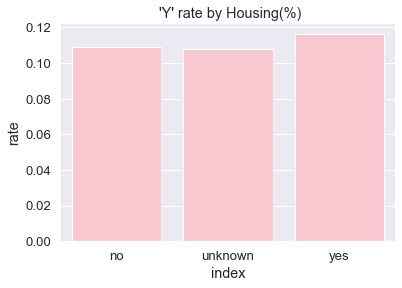

In [203]:
#plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='rate',color='pink', data=housing)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['no', 'unknown', 'yes'])

plt.title(" 'Y' rate by Housing(%)")
plt.show()

## Contact
* cellular >> telephone

In [204]:
#contact
X.groupby(['y','contact'])[['contact']].count()

contact
y contact           
0 cellular     22291
  telephone    14257
1 cellular      3853
  telephone      787

In [205]:
contacts = X.groupby(['contact'])[['y']]
contact = contacts.sum()
contact['count'] = contacts.count()
contact['rate'] = contact['y']/contact['count']
contact['index'] = contact.index
contact

y  count      rate      index
contact                                    
cellular   3853  26144  0.147376   cellular
telephone   787  15044  0.052313  telephone

In [209]:
contact.index

Index(['cellular', 'telephone'], dtype='object', name='contact')

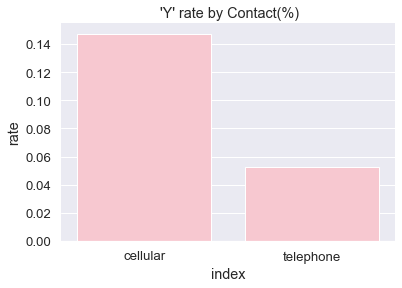

In [210]:
# 비율

#plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='rate',color='pink', data=contact)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['cellular', 'telephone'])

plt.title(" 'Y' rate by Contact(%)")
plt.show()

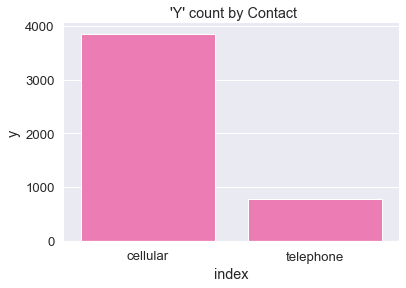

In [288]:
# 카운트

#plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='y',color='hotpink', data=contact)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['cellular', 'telephone'])

plt.title(" 'Y' count by Contact")
plt.show()

## Month
* y = 'yes' : 0.5이상 3월 9월 10월 12월

In [211]:
#month
X.groupby(['y','month'])[['month']].count()

month
y month       
0 apr     2093
  aug     5523
  dec       93
  jul     6525
  jun     4759
  mar      270
  may    12883
  nov     3685
  oct      403
  sep      314
1 apr      539
  aug      655
  dec       89
  jul      649
  jun      559
  mar      276
  may      886
  nov      416
  oct      315
  sep      256

In [212]:
months = X.groupby(['month'])[['y']]
month = months.sum()
month['count'] = months.count()
month['rate'] = month['y']/month['count']
month['index'] = month.index
month

y  count      rate index
month                            
apr    539   2632  0.204787   apr
aug    655   6178  0.106021   aug
dec     89    182  0.489011   dec
jul    649   7174  0.090466   jul
jun    559   5318  0.105115   jun
mar    276    546  0.505495   mar
may    886  13769  0.064347   may
nov    416   4101  0.101439   nov
oct    315    718  0.438719   oct
sep    256    570  0.449123   sep

In [213]:
month.index

Index(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'], dtype='object', name='month')

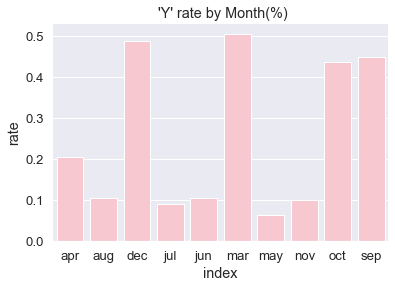

In [214]:
#비율

#plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='rate',color='pink', data=month)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'])

plt.title(" 'Y' rate by Month(%)")
plt.show()

In [287]:
#카운트

#plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='y',color='hotpink', data=month)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep'])

plt.title(" 'Y' count by Month")
plt.show()

## Campagin
* 별로.. 차이 없음

In [249]:
#campaign 지금 캠페인 기간 동안 연락한 횟수
X[X['y']==1]['campaign'].describe()

count    4640.000000
mean        2.051724
std         1.666245
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        23.000000
Name: campaign, dtype: float64

In [250]:
X[X['y']==0]['campaign'].describe()

count    36548.000000
mean         2.633085
std          2.873438
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [256]:
X["campaign_range"] = pd.cut(X["campaign"],
                  bins=[1, 2, 3, 56],
                  labels=['1', '2', 'over'])

campaigns=X.groupby(['campaign_range'])[['y']]
campaign=campaigns.sum()
campaign['count']=campaigns.count()
campaign['rate']=campaign['y']/campaign['count']
campaign['index']=campaign.index
campaign

y  count      rate index
campaign_range                             
1               1211  10570  0.114570     1
2                574   5341  0.107471     2
over             555   7635  0.072692  over

In [258]:
campaign.index

CategoricalIndex(['1', '2', 'over'], categories=['1', '2', 'over'], ordered=True, name='campaign_range', dtype='category')

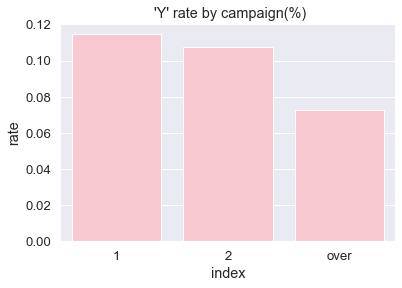

In [259]:
#비율

#plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='rate',color='pink', data=campaign)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['1', '2', 'over'])

plt.title(" 'Y' rate by campaign(%)")
plt.show()

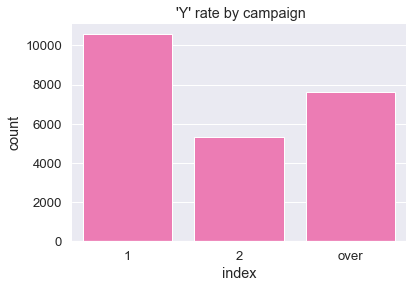

In [286]:
# 카운트

#plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='count',color='hotpink', data=campaign)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['1', '2', 'over'])

plt.title(" 'Y' rate by campaign")
plt.show()

## Pdays
* 연락하는 게 좋다!

In [88]:
#pdays 이전 캠페인에서 마지막으로 고객에게 연락한 후 경과한 일 수
bank[bank['y']=='yes']['pdays'].describe() #거의 안 함

count    4640.000000
mean      792.035560
std       403.407181
min         0.000000
25%       999.000000
50%       999.000000
75%       999.000000
max       999.000000
Name: pdays, dtype: float64

In [89]:
bank[bank['y']=='no']['pdays'].describe() #거의 안 함

count    36548.000000
mean       984.113878
std        120.656868
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

In [14]:
X['pdays'][X['pdays']!= 999] = 0
X['pdays'][X['pdays']== 999] = 1


pdayss=X.groupby(['pdays'])[['y']]
pdays=pdayss.sum()
pdays['count']=pdayss.count()
pdays['rate']=pdays['y']/pdays['count']
pdays['index']=pdays.index
pdays

y  count      rate  index
pdays                              
0       967   1515  0.638284      0
1      3673  39673  0.092582      1

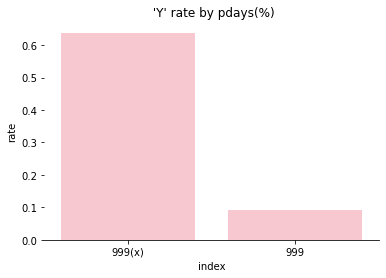

In [17]:
#비율

#plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='rate',color='pink', data=pdays)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['999(x)', '999'])

plt.title(" 'Y' rate by pdays(%)")
plt.show()

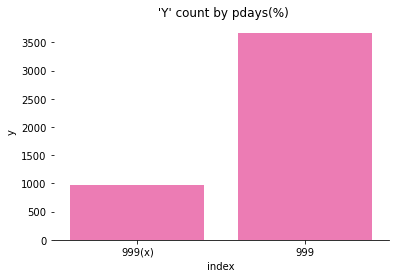

In [18]:
#카운트

#plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='y',color='hotpink', data=pdays)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['999(x)', '999'])

plt.title(" 'Y' count by pdays(%)")
plt.show()

## Previous
* 연락 한번이상이 효과 o

In [90]:
#previous 이번 캠페인 이전에 연락횟수
bank[bank['y']=='yes']['previous'].describe()

count    4640.000000
mean        0.492672
std         0.860344
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         6.000000
Name: previous, dtype: float64

In [91]:
bank[bank['y']=='no']['previous'].describe()

count    36548.000000
mean         0.132374
std          0.409199
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [20]:
X['previous'][X['previous']!= 0] = 1


previouss=X.groupby(['previous'])[['y']]
previous=previouss.sum()
previous['count']=previouss.count()
previous['rate']=previous['y']/previous['count']
previous['index']=previous.index
previous

y  count      rate  index
previous                              
0         3141  35563  0.088322      0
1         1499   5625  0.266489      1

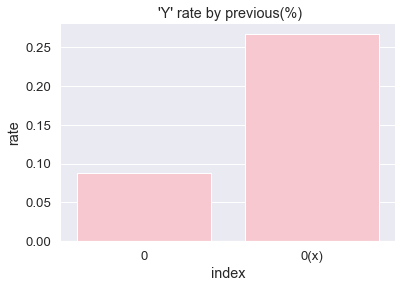

In [25]:
#비율

#plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='rate',color='pink', data=previous)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['0', '0(x)'])

plt.title(" 'Y' rate by previous(%)")
plt.show()

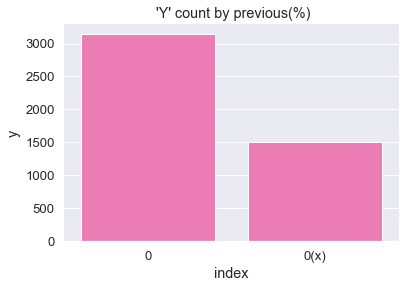

In [24]:
#카운트

#plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='y',color='hotpink', data=previous)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['0', '0(x)'])

plt.title(" 'Y' count by previous(%)")
plt.show()

## Poutcome
* 1. nonexistent 어떻게 처리할지
* 지난번에 성공했으면 이번에도 0.6 정도로 성공

In [260]:
#poutcome : outcome of the previous marketing campaign 가장 의미 있음.
bank.groupby(['y','poutcome'])[['poutcome']].count()

poutcome
y   poutcome             
no  failure          3647
    nonexistent     32422
    success           479
yes failure           605
    nonexistent      3141
    success           894

In [261]:
poutcomes=X.groupby(['poutcome'])[['y']]
poutcome=poutcomes.sum()
poutcome['count']= poutcomes.count()
poutcome['rate']= poutcome['y']/poutcome['count']
poutcome['index']= poutcome.index
poutcome

y  count      rate        index
poutcome                                       
failure       605   4252  0.142286      failure
nonexistent  3141  35563  0.088322  nonexistent
success       894   1373  0.651129      success

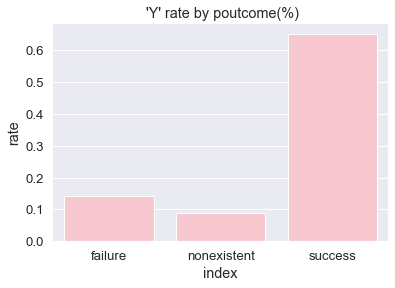

In [262]:
#비율

#plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='rate',color='pink', data=poutcome)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['failure', 'nonexistent', 'success'])

plt.title(" 'Y' rate by poutcome(%)")
plt.show()

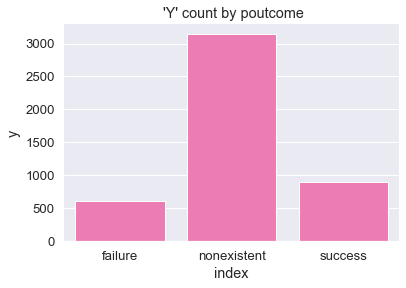

In [285]:
#카운트

#plt.figure(figsize=(18,8))
graph = sns.barplot(x='index', y='y',color='hotpink', data=poutcome)
sns.despine(left=True)
#sns.set(font_scale=1.2)
graph.set_xticklabels(['failure', 'nonexistent', 'success'])

plt.title(" 'Y' count by poutcome")
plt.show()

## emp.var.rate - employment variation rate - quarterly indicator (numeric)

In [264]:
X['emp.var.rate'].describe()

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

## cons.price.idx - consumer price index - monthly indicator (numeric) 소비자 물가지수

In [265]:
X['cons.price.idx'].describe()

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

## cons.conf.idx - consumer confidence index - monthly indicator (numeric) 경제상태에 대한 낙관 정도

In [266]:
X['cons.conf.idx'].describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

## euribor3m - daily indicator (numeric)

In [267]:
X['euribor3m'].describe()

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

## nr.employed - quarterly indicator (numeric) number of employees?

In [268]:
X['nr.employed'].describe()

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

In [27]:
X.corr()

age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034292  0.016376   
duration       -0.000866  1.000000 -0.071699 -0.047634  0.011665   
campaign        0.004594 -0.071699  1.000000  0.052569 -0.087645   
pdays          -0.034292 -0.047634  0.052569  1.000000 -0.491357   
previous        0.016376  0.011665 -0.087645 -0.491357  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.270945 -0.472501   
cons.price.idx  0.000857  0.005312  0.127836  0.078715 -0.304264   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091254 -0.099724   
euribor3m       0.010767 -0.032897  0.135133  0.296920 -0.488406   
nr.employed    -0.017725 -0.044703  0.144095  0.372682 -0.493051   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                -0.000371        0.000857       0.129372   0.010767   
duration           -0.027968        0.005312      -0.008173  -0.032897   
campaign            0.150754        0.127836      -0.013733   0.135133   
pdays               0.270945        0.078715      -0.091254   0.296920   
previous           -0.472501       -0.304264      -0.099724  -0.488406   
emp.var.rate        1.000000        0.775334       0.196041   0.972245   
cons.price.idx      0.775334        1.000000       0.058986   0.688230   
cons.conf.idx       0.196041        0.058986       1.000000   0.277686   
euribor3m           0.972245        0.688230       0.277686   1.000000   
nr.employed         0.906970        0.522034       0.100513   0.945154   

                nr.employed  
age               -0.017725  
duration          -0.044703  
campaign           0.144095  
pdays              0.372682  
previous          -0.493051  
emp.var.rate       0.906970  
cons.price.idx     0.522034  
cons.conf.idx      0.100513  
euribor3m          0.945154  
nr.employed        1.000000

In [7]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
pipe_log = make_pipeline(preprocessor, LogisticRegression(solver='newton-cg',multi_class= 'multinomial'))
pipe_log.fit(X_train,y_train)
y_log_pred = pipe_log.predict(X_test)
accuracy_score(y_test, y_log_pred)